Graph Convolutional Networks by [**Moussa Jamor**](https://github.com/JamorMoussa)

# Graph Convolutional Networks

In this notebook, we will explore the concept of **Graph Convolutional Networks** as introduced by *Thomas N. Kipf* and *Max Welling* in their paper titled [<u>Semi-Supervised Classification with Graph Convolutional Networks</u>](https://arxiv.org/pdf/1609.02907v4.pdf).

## Prior Concepts

Before delving into complex concepts, let's first gain a basic understanding of fundamental concepts and building blocks that are essential for comprehending **Graph Convolutional Networks (GCN)**.

### What's a Graph ?

The first concepts that we need to define is **Graph**. A **Graph** is mathematical structure comprising of **Edges** and **Vertices**. Denoted as $G = (E, V)$. Where the $V$ represents set of Vertices and $E$ represents set of Edges. The vertices, also known as **Nodes**, while the edge represents the connections or relationship between two vertices.

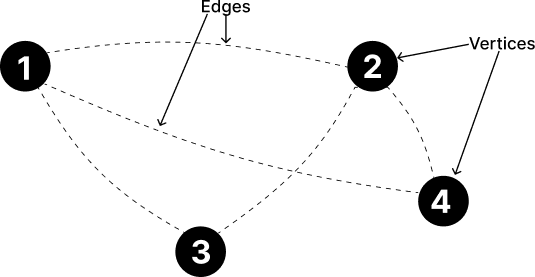

### Adjacency Matrix 